# Importing required Libraries

In [637]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [638]:
import pandas as pd
data=pd.read_csv('heartdisease_data.csv',na_values='?',names=['#3(age)','#4(sex)','#9(cp)','#10(trestbps)','#12(chol)',
                                                              '#16(fbs)','#19(restecg)','#32(thalach)','#38(exang)',
                                                              '#40(oldpeak)','#41(slope)','#44(ca)','#51(thal)',
                                                              '#58 (num)(the predicted attribute)'])
df=pd.DataFrame(data)
df.head()

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#44(ca),#51(thal),#58 (num)(the predicted attribute)
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [639]:
df.shape

(200, 14)

In [640]:
df.dtypes

#3(age)                                 int64
#4(sex)                                 int64
#9(cp)                                  int64
#10(trestbps)                         float64
#12(chol)                             float64
#16(fbs)                              float64
#19(restecg)                            int64
#32(thalach)                          float64
#38(exang)                            float64
#40(oldpeak)                          float64
#41(slope)                            float64
#44(ca)                               float64
#51(thal)                             float64
#58 (num)(the predicted attribute)      int64
dtype: object

In [641]:
df.columns

Index(['#3(age)', '#4(sex)', '#9(cp)', '#10(trestbps)', '#12(chol)',
       '#16(fbs)', '#19(restecg)', '#32(thalach)', '#38(exang)',
       '#40(oldpeak)', '#41(slope)', '#44(ca)', '#51(thal)',
       '#58 (num)(the predicted attribute)'],
      dtype='object')

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   #3(age)                             200 non-null    int64  
 1   #4(sex)                             200 non-null    int64  
 2   #9(cp)                              200 non-null    int64  
 3   #10(trestbps)                       144 non-null    float64
 4   #12(chol)                           193 non-null    float64
 5   #16(fbs)                            193 non-null    float64
 6   #19(restecg)                        200 non-null    int64  
 7   #32(thalach)                        147 non-null    float64
 8   #38(exang)                          147 non-null    float64
 9   #40(oldpeak)                        144 non-null    float64
 10  #41(slope)                          98 non-null     float64
 11  #44(ca)                             2 non-nul

# EDA Process

In [643]:
df.describe()

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#44(ca),#51(thal),#58 (num)(the predicted attribute)
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


There is not much difference between 75% and max in all columns. Less Outliers might have present.

Also Median(50%) and Mean are close.

# Checking Null Values

In [644]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [645]:
df.isnull()

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#44(ca),#51(thal),#58 (num)(the predicted attribute)
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,True,True,True,False
196,False,False,False,True,False,False,False,True,True,True,True,True,True,False
197,False,False,False,False,False,False,False,False,False,False,True,True,False,False
198,False,False,False,True,False,False,False,True,True,True,True,True,True,False


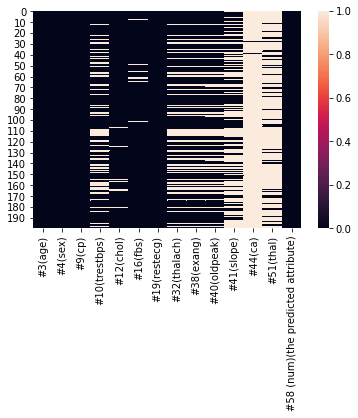

In [646]:
sns.heatmap(df.isnull())

In [647]:
df.isnull().sum()

#3(age)                                 0
#4(sex)                                 0
#9(cp)                                  0
#10(trestbps)                          56
#12(chol)                               7
#16(fbs)                                7
#19(restecg)                            0
#32(thalach)                           53
#38(exang)                             53
#40(oldpeak)                           56
#41(slope)                            102
#44(ca)                               198
#51(thal)                             166
#58 (num)(the predicted attribute)      0
dtype: int64

There are many null values.

In [648]:
df.shape

(200, 14)

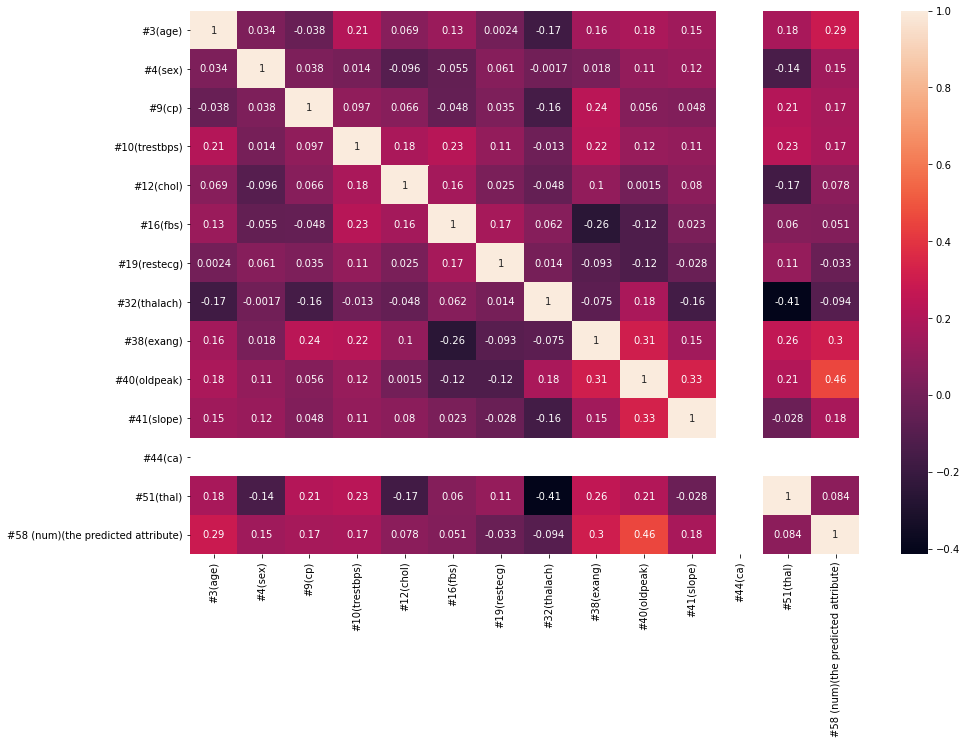

In [649]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

There are 198 null values in #44(ca) column and total rows is 200. So only 2 #44(ca) present in the entire dataset. So we can drop this column.

There is also 166 null values in #51(thal) column, and the correlation with the predicted value is very less as 0.084. Here, we also can drop this column as 166/200=83% values are null.

In [650]:
df.drop(['#44(ca)','#51(thal)'],axis=1,inplace=True)
df

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#58 (num)(the predicted attribute)
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,0


As all the na values are numeric, we can take median of columns to replace the null values

In [651]:
for col in ['#10(trestbps)','#12(chol)','#16(fbs)','#32(thalach)','#38(exang)','#40(oldpeak)','#41(slope)']:
    df[col].fillna(value=df[col].median(),inplace=True)

In [652]:
df

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#58 (num)(the predicted attribute)
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,2.0,1
196,62,1,1,130.0,139.0,0.0,1,120.0,1.0,1.5,2.0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2.0,2
198,58,1,4,130.0,385.0,1.0,2,120.0,1.0,1.5,2.0,0


In [653]:
df.isnull().sum()

#3(age)                               0
#4(sex)                               0
#9(cp)                                0
#10(trestbps)                         0
#12(chol)                             0
#16(fbs)                              0
#19(restecg)                          0
#32(thalach)                          0
#38(exang)                            0
#40(oldpeak)                          0
#41(slope)                            0
#58 (num)(the predicted attribute)    0
dtype: int64

Now Dataset has no null values.

# Univariate Analysis

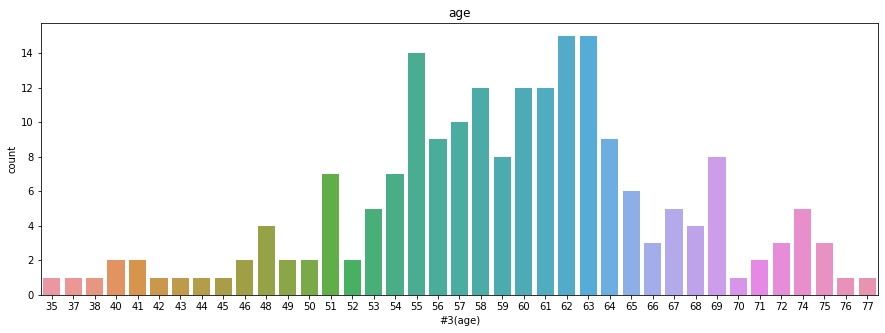

In [654]:
plt.figure(figsize=(15,5))
sns.countplot(x='#3(age)',data=df)
plt.title('age')
plt.show()

Observation:

The age group between 51-69 has heart diseases in higher rate.

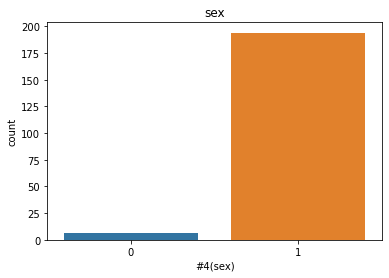

In [655]:
sns.countplot(x='#4(sex)',data=df)
plt.title('sex')
plt.show()

Observation:

As it is not given 0 and 1 specified which gender. One gender group which is noted as 1 has number of heart diseases in this dataset.

# Bivariate Analysis

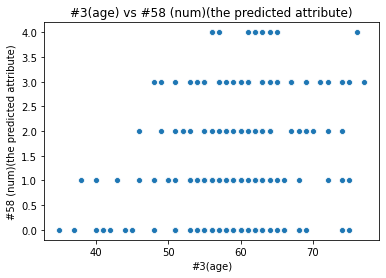

In [656]:
sns.scatterplot(x=df['#3(age)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#3(age) vs #58 (num)(the predicted attribute)')
plt.show()

Observation:

Ages more than 50 has chances of higher level of heart diseases.

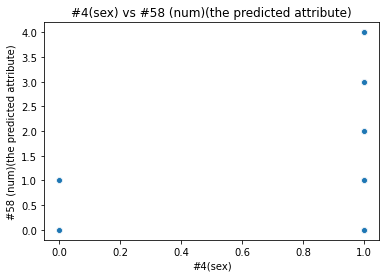

In [657]:
sns.scatterplot(x=df['#4(sex)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#4(sex) vs #58 (num)(the predicted attribute)')
plt.show()

Observation:

The Gender denoted as 1 has high level Heart Diseases.

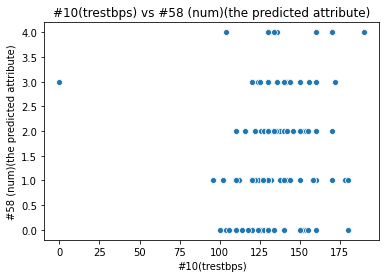

In [658]:
sns.scatterplot(x=df['#10(trestbps)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#10(trestbps) vs #58 (num)(the predicted attribute)')
plt.show()

Observation:

Higher trestbps ie 100-175, the Leevel of Heart Disease increased.

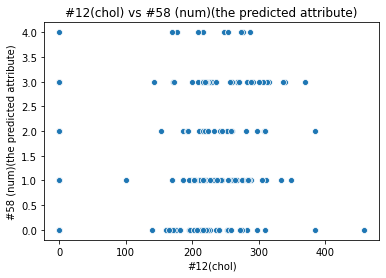

In [659]:
sns.scatterplot(x=df['#12(chol)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#12(chol) vs #58 (num)(the predicted attribute)')
plt.show()

Observation:

Those having cholestrol level above 200, they have high level of Heart Diseases.

There are some more medical parameters the relationship is shown as following codes.

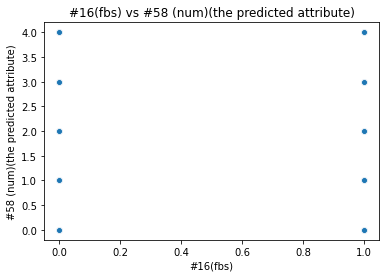

In [660]:
sns.scatterplot(x=df['#16(fbs)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#16(fbs) vs #58 (num)(the predicted attribute)')
plt.show()

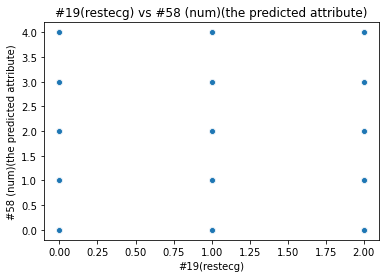

In [661]:
sns.scatterplot(x=df['#19(restecg)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#19(restecg) vs #58 (num)(the predicted attribute)')
plt.show()

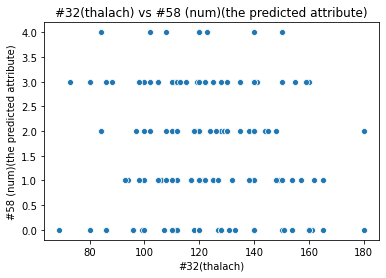

In [662]:
sns.scatterplot(x=df['#32(thalach)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#32(thalach) vs #58 (num)(the predicted attribute)')
plt.show()

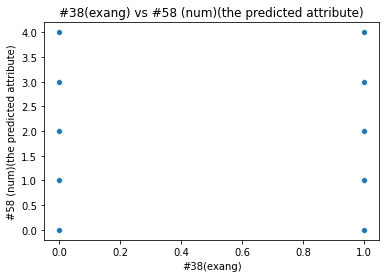

In [663]:
sns.scatterplot(x=df['#38(exang)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#38(exang) vs #58 (num)(the predicted attribute)')
plt.show()

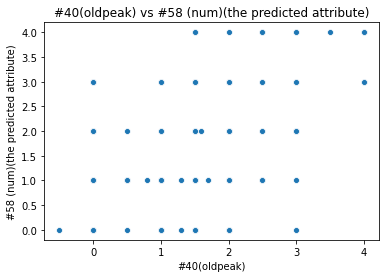

In [664]:
sns.scatterplot(x=df['#40(oldpeak)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#40(oldpeak) vs #58 (num)(the predicted attribute)')
plt.show()

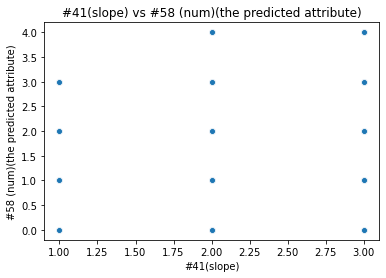

In [665]:
sns.scatterplot(x=df['#41(slope)'],y=df['#58 (num)(the predicted attribute)'],data=df)
plt.title('#41(slope) vs #58 (num)(the predicted attribute)')
plt.show()

# Multivariate Analysis

# Correlation

In [666]:
dfcorr=df.corr()
dfcorr

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#58 (num)(the predicted attribute)
#3(age),1.000000,0.034230,-0.038280,0.179566,0.069953,0.135728,0.002400,-0.150146,0.129027,0.156191,0.107135,0.287289
#4(sex),0.034230,1.000000,0.038036,0.008429,-0.093922,-0.059400,0.060621,-0.004156,0.029402,0.100713,0.086709,0.147470
#9(cp),-0.038280,0.038036,1.000000,0.094128,0.068766,-0.044416,0.034790,-0.108585,0.089904,0.015627,0.059460,0.168210
#10(trestbps),0.179566,0.008429,0.094128,1.000000,0.142605,0.185084,0.088871,-0.005253,0.173210,0.103139,0.088883,0.145444
#12(chol),0.069953,-0.093922,0.068766,0.142605,1.000000,0.175249,0.028739,-0.044767,0.116148,0.015728,0.041670,0.079529
#16(fbs),0.135728,-0.059400,-0.044416,0.185084,0.175249,1.000000,0.170616,0.033219,-0.176144,-0.096999,-0.009435,0.048940
#19(restecg),0.002400,0.060621,0.034790,0.088871,0.028739,0.170616,1.000000,0.010094,-0.063203,-0.102623,-0.039881,-0.032800
#32(thalach),-0.150146,-0.004156,-0.108585,-0.005253,-0.044767,0.033219,0.010094,1.000000,-0.093316,0.171803,-0.101567,-0.073072
#38(exang),0.129027,0.029402,0.089904,0.173210,0.116148,-0.176144,-0.063203,-0.093316,1.000000,0.315578,0.106259,0.206541
#40(oldpeak),0.156191,0.100713,0.015627,0.103139,0.015728,-0.096999,-0.102623,0.171803,0.315578,1.000000,0.284230,0.366526


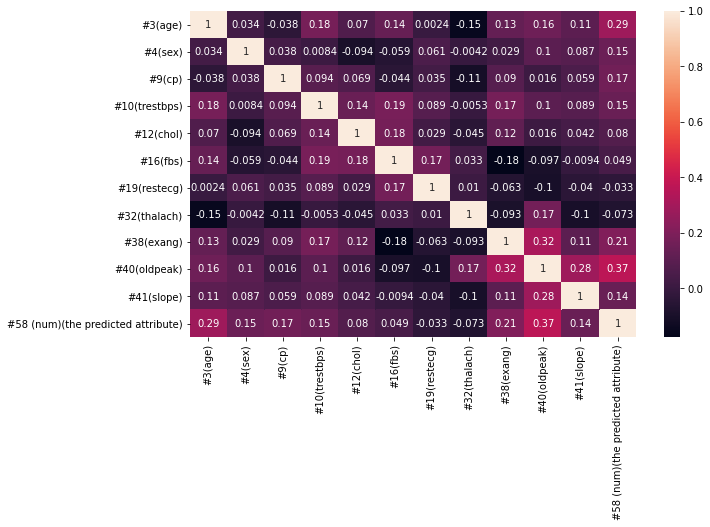

In [667]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorr,annot=True)

Age,Sex,CP,trestbps,chol,exang,fbs,oldpeak,slope are positively correlated with the level of Heart Disease.

# Checking Outliers

In [668]:
df.shape

(200, 12)

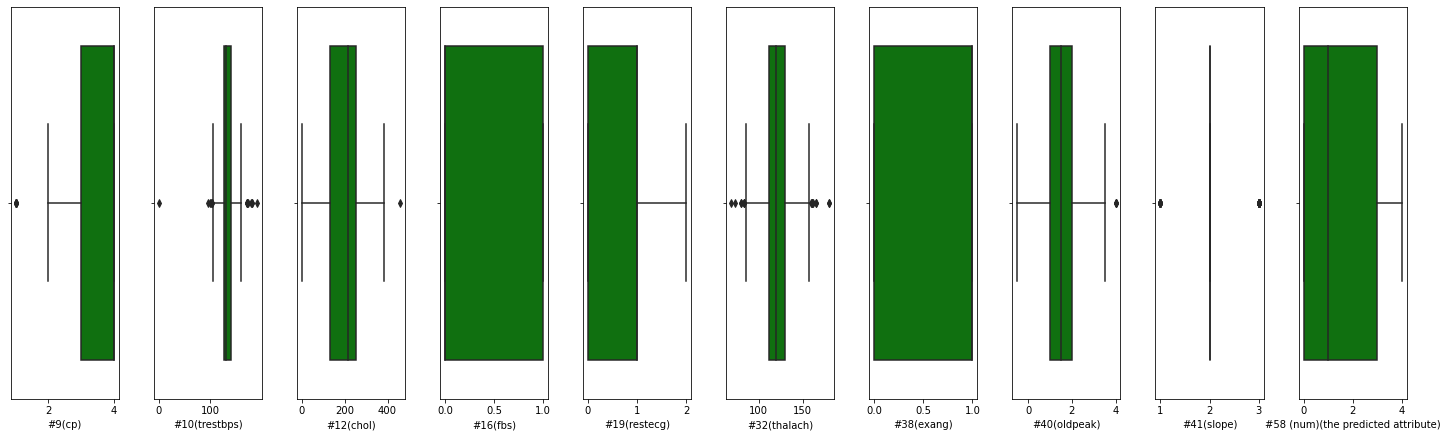

In [669]:
collist=df.columns.values
ncol=12
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(2,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

There is some outliers in #10(trestbps),#32(thalach)

# Removal of Outliers

Z Score Method

In [670]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

new_df

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope),#58 (num)(the predicted attribute)
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,2.0,1
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,2.0,2
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2.0,2
198,58,1,4,130.0,385.0,1.0,2,120.0,1.0,1.5,2.0,0


In [671]:
df.shape

(200, 12)

In [672]:
new_df.shape

(181, 12)

Percentage loss in data while removing outliers

In [673]:
P=(200-181)*100/200
P

9.5

9.5% is higher for removing outliers from dataset

# Checking Skewness

In [674]:
new_df.skew()

#3(age)                              -0.341400
#4(sex)                               0.000000
#9(cp)                               -1.414098
#10(trestbps)                         0.698089
#12(chol)                            -0.580544
#16(fbs)                              0.748785
#19(restecg)                          0.386145
#32(thalach)                          0.058124
#38(exang)                           -1.207866
#40(oldpeak)                          0.291281
#41(slope)                            0.273012
#58 (num)(the predicted attribute)    0.274859
dtype: float64

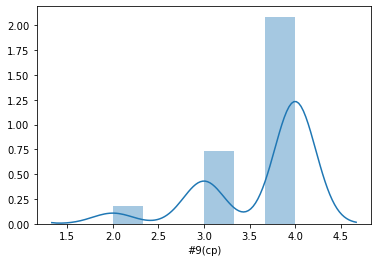

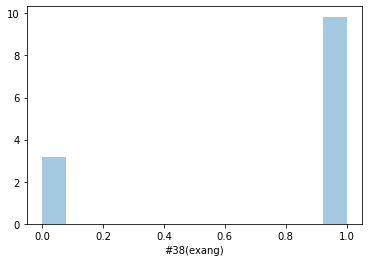

In [675]:
for l in ['#9(cp)','#38(exang)']:
    sns.distplot(new_df[l])
    plt.show()

In [694]:
x=new_df.iloc[:,0:-1]
x

,#3(age),#4(sex),#9(cp),#10(trestbps),#12(chol),#16(fbs),#19(restecg),#32(thalach),#38(exang),#40(oldpeak),#41(slope)
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,2.0
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,2.0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2.0
198,58,1,4,130.0,385.0,1.0,2,120.0,1.0,1.5,2.0


In [695]:
x.skew()

#3(age)         -0.341400
#4(sex)          0.000000
#9(cp)          -1.414098
#10(trestbps)    0.698089
#12(chol)       -0.580544
#16(fbs)         0.748785
#19(restecg)     0.386145
#32(thalach)     0.058124
#38(exang)      -1.207866
#40(oldpeak)     0.291281
#41(slope)       0.273012
dtype: float64

In [696]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt_x=pd.DataFrame(pt.fit_transform(x))
pt_x

,0,1,2,3,4,5,6,7,8,9,10
0,0.429569,0.0,0.659061,0.514456,0.692419,-0.695418,0.526146,-0.497381,0.566717,1.611522,-0.148035
1,-1.874986,0.0,0.659061,-0.127909,0.397498,-0.695418,0.526146,0.340953,-1.764550,-1.504483,-0.148035
2,0.024317,0.0,0.659061,0.007315,0.451542,-0.695418,0.526146,1.064231,0.566717,0.216858,1.939711
3,-0.617118,0.0,0.659061,0.633455,0.510520,-0.695418,0.526146,1.563344,0.566717,1.169242,-2.423016
4,0.849917,0.0,-1.446242,-1.711183,0.421634,1.437984,1.565682,-1.227629,0.566717,0.012506,-0.148035
...,...,...,...,...,...,...,...,...,...,...,...
176,0.292800,0.0,0.659061,1.490267,0.151235,-0.695418,0.526146,0.953142,0.566717,-1.504483,-0.148035
177,-1.662272,0.0,0.659061,0.139025,0.959033,-0.695418,-1.157477,0.285195,-1.764550,-1.504483,-0.148035
178,-0.617118,0.0,0.659061,-0.707055,0.481167,1.437984,0.526146,-1.171324,-1.764550,-1.504483,-0.148035
179,-0.237386,0.0,0.659061,-0.127909,1.327577,1.437984,1.565682,-0.049737,0.566717,0.216858,-0.148035


In [713]:
pt_x.skew()

0     0.014688
1     0.000000
2    -0.877102
3    -0.014800
4    -0.947636
5     0.748785
6    -0.019313
7     0.033219
8    -1.207866
9    -0.059880
10    0.064959
dtype: float64

Some Skewness is removed.

# Preparing Input and Output Variables for Model Training

In [714]:
pt_x

,0,1,2,3,4,5,6,7,8,9,10
0,0.429569,0.0,0.659061,0.514456,0.692419,-0.695418,0.526146,-0.497381,0.566717,1.611522,-0.148035
1,-1.874986,0.0,0.659061,-0.127909,0.397498,-0.695418,0.526146,0.340953,-1.764550,-1.504483,-0.148035
2,0.024317,0.0,0.659061,0.007315,0.451542,-0.695418,0.526146,1.064231,0.566717,0.216858,1.939711
3,-0.617118,0.0,0.659061,0.633455,0.510520,-0.695418,0.526146,1.563344,0.566717,1.169242,-2.423016
4,0.849917,0.0,-1.446242,-1.711183,0.421634,1.437984,1.565682,-1.227629,0.566717,0.012506,-0.148035
...,...,...,...,...,...,...,...,...,...,...,...
176,0.292800,0.0,0.659061,1.490267,0.151235,-0.695418,0.526146,0.953142,0.566717,-1.504483,-0.148035
177,-1.662272,0.0,0.659061,0.139025,0.959033,-0.695418,-1.157477,0.285195,-1.764550,-1.504483,-0.148035
178,-0.617118,0.0,0.659061,-0.707055,0.481167,1.437984,0.526146,-1.171324,-1.764550,-1.504483,-0.148035
179,-0.237386,0.0,0.659061,-0.127909,1.327577,1.437984,1.565682,-0.049737,0.566717,0.216858,-0.148035


In [686]:
y=pd.DataFrame(new_df.iloc[:,-1])
y

,#58 (num)(the predicted attribute)
0,2
1,0
2,2
3,1
4,0
...,...
193,1
194,2
197,2
198,0


# Scaling the Input Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

# The target variable is discrete value for the checking of levels of Heart Disease. So it is a Classification type.

# Finding Best Random State

In [688]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(pt_x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 124


# Linear Regression

In [697]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_x,test_x,train_y,test_y=train_test_split(pt_x,y,test_size=0.30,random_state=124)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),
          RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for mc in modelclf:
    mc.fit(train_x,train_y)
    mc_y=mc.predict(test_x)
    print("Accuracy Score of",mc,"is",accuracy_score(test_y,mc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,mc_y))
    print("Classification Report\n", classification_report(test_y,mc_y))
    print("*******************************************************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.32727272727272727
Confusion Matrix
 [[7 6 2 2 0]
 [6 6 1 0 0]
 [2 8 1 1 0]
 [0 4 1 4 0]
 [0 0 2 2 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.47      0.41      0.44        17
           1       0.25      0.46      0.32        13
           2       0.14      0.08      0.11        12
           3       0.44      0.44      0.44         9
           4       0.00      0.00      0.00         4

    accuracy                           0.33        55
   macro avg       0.26      0.28      0.26        55
weighted avg       0.31      0.33      0.31        55

*******************************************************************



Accuracy Score of KNeighborsClassifier() is 0.36363636363636365
Confusion Matrix
 [[8 6 1 2 0]
 [2 8 2 1 0]
 [1 3 3 5 0]
 [0 6 2 1 0]
 [0 1 2 1 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.47      0.57  

41.82% is the highest accuracy score from SVC(). The model is very poor.

# MultinomialNB

In [699]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=124)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb_y=mnb.predict(x_test)

print("Accuracy Score of MultinomialNB is",accuracy_score(y_test,mnb_y))
print("Confusion Matrix\n",confusion_matrix(y_test,mnb_y))
print("Classification Report\n", classification_report(y_test,mnb_y))

Accuracy Score of MultinomialNB is 0.2
Confusion Matrix
 [[1 3 4 9 0]
 [0 0 4 9 0]
 [1 1 3 7 0]
 [0 0 2 7 0]
 [0 0 0 4 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.00      0.00      0.00        13
           2       0.23      0.25      0.24        12
           3       0.19      0.78      0.31         9
           4       0.00      0.00      0.00         4

    accuracy                           0.20        55
   macro avg       0.19      0.22      0.13        55
weighted avg       0.24      0.20      0.14        55



Only 20% Accuracy from MultinomialNB.

# GridSearchCV

Hypertuning SVR using GridSearchCV.

In [700]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(pt_x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [701]:
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


These are the parameters that will be fed to SVR to create a best model.

# Support Vector Machine

In [703]:
svr=SVC(kernel='rbf',C=10) #parameters given from GridSearchCV method.
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
svr_y=svr.predict(test_x)

print("Accuracy Score of SVC is",accuracy_score(test_y,svr_y))
print("Confusion Matrix\n",confusion_matrix(test_y,svr_y))
print("Classification Report\n", classification_report(test_y,svr_y))

Accuracy Score of SVC is 0.34545454545454546
Confusion Matrix
 [[8 5 2 2 0]
 [2 8 0 2 1]
 [0 6 2 4 0]
 [1 5 2 1 0]
 [0 1 2 1 0]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.32      0.62      0.42        13
           2       0.25      0.17      0.20        12
           3       0.10      0.11      0.11         9
           4       0.00      0.00      0.00         4

    accuracy                           0.35        55
   macro avg       0.28      0.27      0.26        55
weighted avg       0.37      0.35      0.34        55



34.54% Accuracy of SVC after Hypertuning. Accuracy decreased.

# CROSS VALIDATION

In [704]:
from sklearn.model_selection import cross_val_score
for m in modelclf:
    mscores=cross_val_score(m,pt_x,y,cv=5)
    print("Scores of",m,"is",mscores)
    print("Mean Score of",m,"is",mscores.mean(),"\nStandard Deviation is",mscores.std())
    print("****************************************************************************\n\n")

Scores of LogisticRegression() is [0.32432432 0.33333333 0.33333333 0.47222222 0.25      ]
Mean Score of LogisticRegression() is 0.3426426426426426 
Standard Deviation is 0.07194777820819348
****************************************************************************


Scores of KNeighborsClassifier() is [0.43243243 0.38888889 0.33333333 0.30555556 0.36111111]
Mean Score of KNeighborsClassifier() is 0.3642642642642643 
Standard Deviation is 0.043969645508265355
****************************************************************************


Scores of DecisionTreeClassifier() is [0.21621622 0.30555556 0.33333333 0.33333333 0.27777778]
Mean Score of DecisionTreeClassifier() is 0.29324324324324325 
Standard Deviation is 0.043676921127810395
****************************************************************************


Scores of SVC() is [0.40540541 0.38888889 0.30555556 0.44444444 0.33333333]
Mean Score of SVC() is 0.37552552552552554 
Standard Deviation is 0.0499943634153916
**************

# Conclusion

SVC is the best model having accuracy of 41.82%.

In [708]:
svc=SVC()
svc.fit(train_x,train_y)
svc_y=svc.predict(test_x)

print("Accuracy Score of SVC is",accuracy_score(test_y,svc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,svc_y))
print("Classification Report\n", classification_report(test_y,svc_y))

Accuracy Score of SVC is 0.41818181818181815
Confusion Matrix
 [[ 8  6  1  2  0]
 [ 2 11  0  0  0]
 [ 0  5  2  5  0]
 [ 1  4  2  2  0]
 [ 0  0  3  1  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.42      0.85      0.56        13
           2       0.25      0.17      0.20        12
           3       0.20      0.22      0.21         9
           4       0.00      0.00      0.00         4

    accuracy                           0.42        55
   macro avg       0.32      0.34      0.31        55
weighted avg       0.41      0.42      0.39        55



# Saving the Model

In [712]:
import pickle

filename='Heart_Disease_svc.pkl'
pickle.dump(svc,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 3, 1, 2, 1,
       3, 0, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1,
       3, 1, 0, 1, 3, 0, 3, 0, 1, 2, 0], dtype=int64)